In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import fft
from scipy import stats
from scipy.signal import get_window
import glob
import time
def rfft(y): #the imput are 2d arrays bc this function computes multiple ffts
    Y = fft.rfft(y) 
    all_phases = np.angle(Y)
    
    return Y, all_phases


def filtering_func(freqs, fft, phases, f1, f2):
    fft_in_range = fft[(freqs >= f1) & (freqs <= f2)]

    peak = np.max(fft_in_range)

    peak_indices = np.where(fft_in_range == peak)[0]
    peak_f = freqs[(freqs >= f1) & (freqs <= f2)][peak_indices]

    peak_phase = phases[(freqs >= f1) & (freqs <= f2)][peak_indices]

    print(f'sum: {np.sum(np.isin(freqs, peak_f))}')
    return peak_f, peak_phase

In [3]:
mint = 0
maxt = 10
N = 50000
step = ( maxt - mint )/N
times = np.arange(0, 10, step)
print(times)
print(f"len(times): {len(times)}")

f_s = N/maxt
print(f"f_s = {f_s} = 1/step = {1/step}")

#amplitudes1 = np.sin(5 * 2*np.pi * times + np.pi/2) 
#np.pi/2 is necessary for the fft bc it uses cos
amplitudes1 = np.sin(5 * 2*np.pi * times + np.pi/2)
amplitudes2 = np.sin(3 * 2*np.pi * times + np.pi/2) 
amplitudes = amplitudes2 + amplitudes1

[0.0000e+00 2.0000e-04 4.0000e-04 ... 9.9994e+00 9.9996e+00 9.9998e+00]
len(times): 50000
f_s = 5000.0 = 1/step = 5000.0


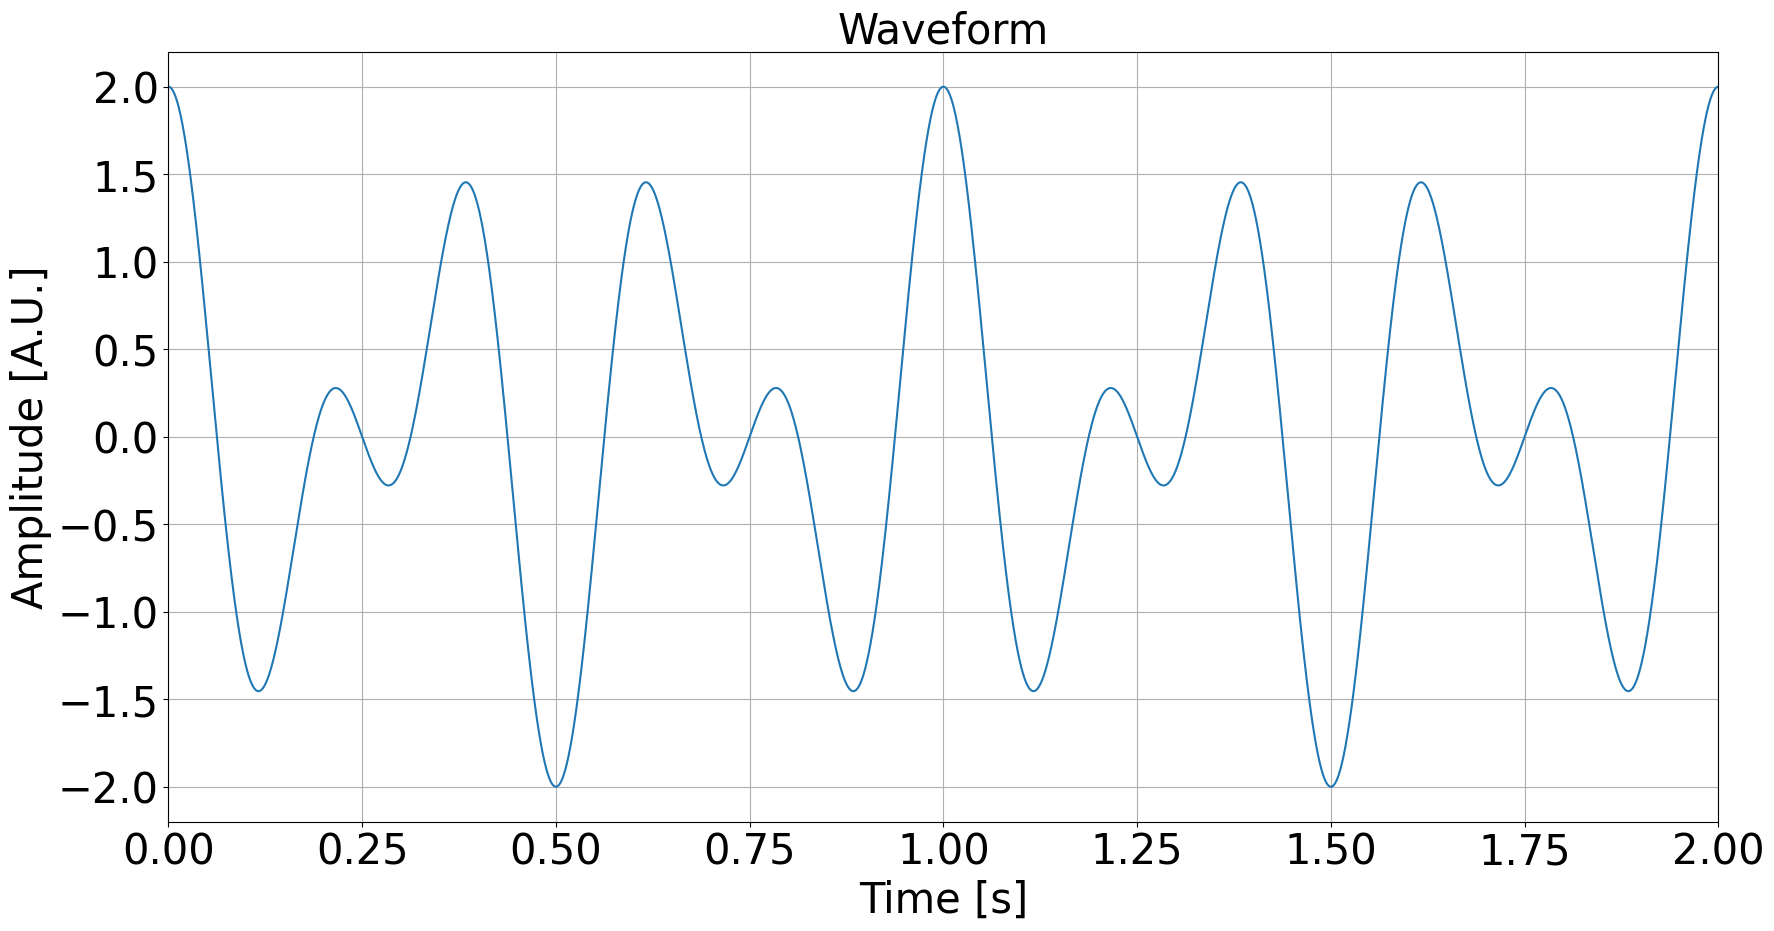

In [4]:
plt.figure(figsize = (20, 10))
plt.plot(times, amplitudes)
plt.title('Waveform', fontsize = 30)
plt.xlabel('Time [s]', fontsize = 30)
plt.xticks(fontsize = 30)
plt.ylabel('Amplitude [A.U.]', fontsize = 30)
plt.yticks(fontsize = 30)
plt.xlim(0, 2)
plt.grid(True)

#plt.savefig("Results/simple_ifft.png", format = "png", bbox_inches="tight")
#plt.savefig("Results/simple_ifft.pdf", format = "pdf", bbox_inches="tight")
plt.show()

## FFT

In [16]:
freqs = fft.rfftfreq(len(times), 1/f_s)
print(freqs[-1]) ##this should be the half of f_s.

print(f"len(freqs): {len(freqs)}")
magnitudes, phases = rfft(amplitudes) #when i'm filtering, i'm filtering something complex
magnitudes = np.abs(magnitudes)

2500.0
len(freqs): 25001


ridefinition of f_s: 25000.0


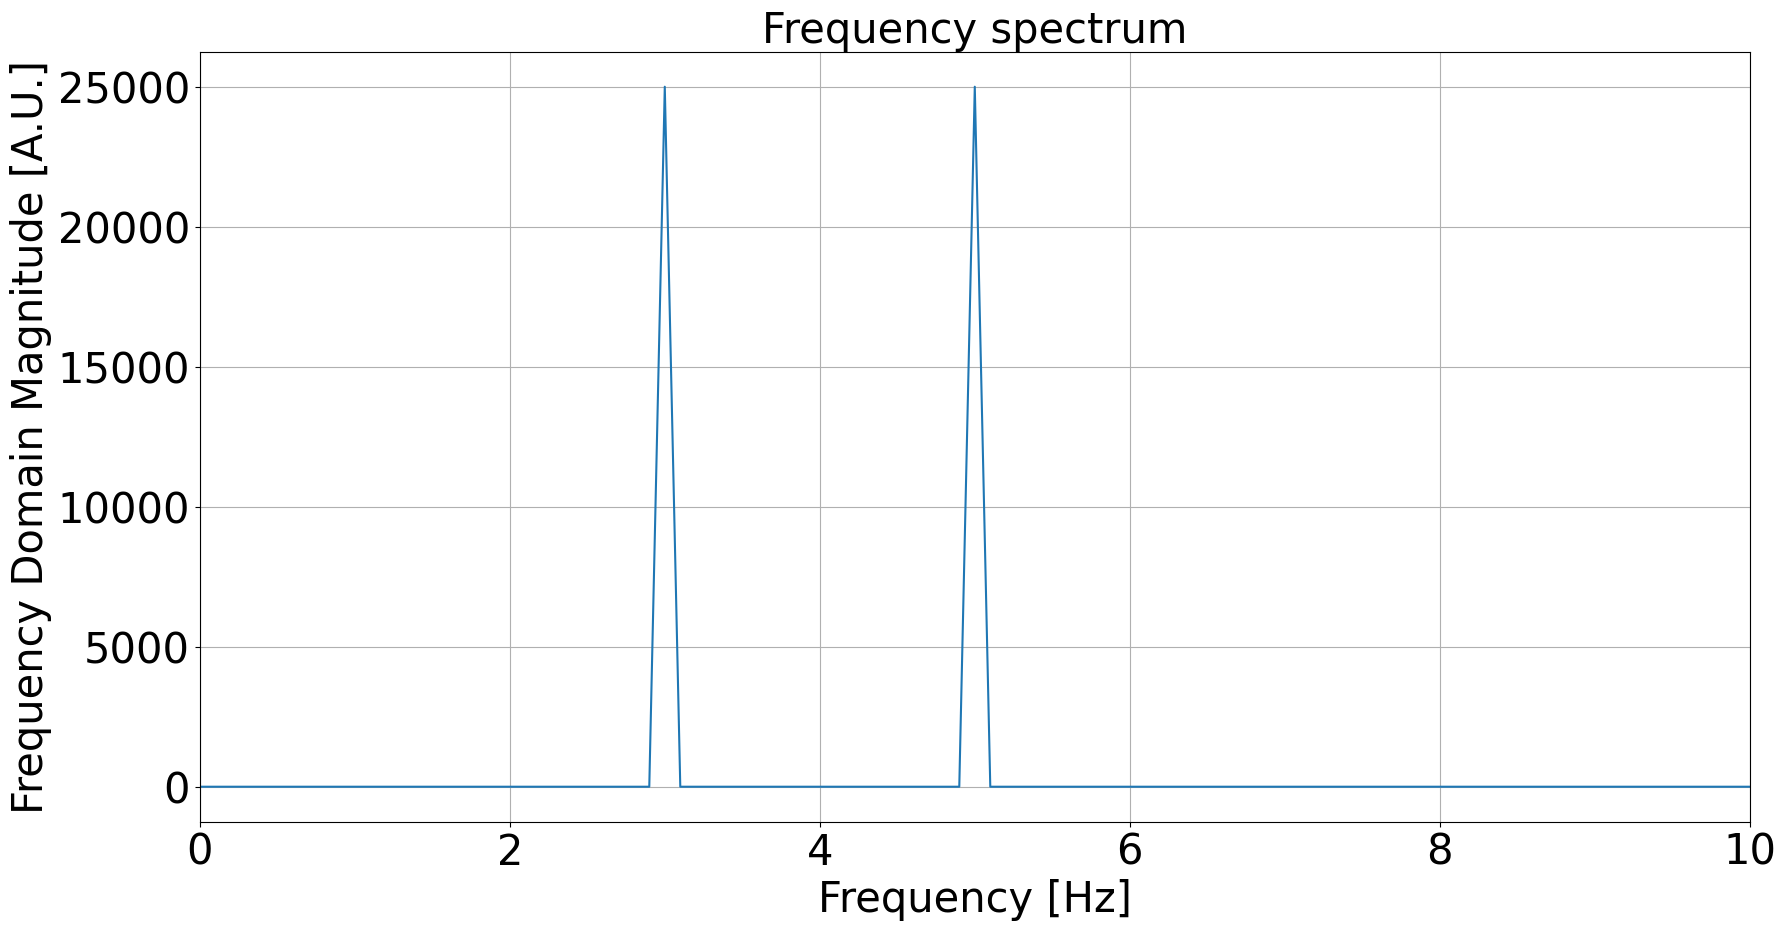

In [26]:
f_s_new = 10 * freqs[-1]
print(f"ridefinition of f_s: {f_s_new}")
plt.figure(figsize=(20, 10))
plt.plot(freqs, magnitudes)
plt.title('Frequency spectrum', fontsize = 30)
plt.xlabel('Frequency [Hz]', fontsize = 30)
plt.xticks(fontsize = 30)
plt.ylabel('Frequency Domain Magnitude [A.U.]', fontsize = 30)
plt.yticks(fontsize = 30)
plt.xlim(0, f_s /500)
plt.grid(True)

#plt.savefig("Results/simple_fft.png", format = "png", bbox_inches="tight")
#plt.savefig("Results/simple_fft.pdf", format = "pdf", bbox_inches="tight")
plt.show()

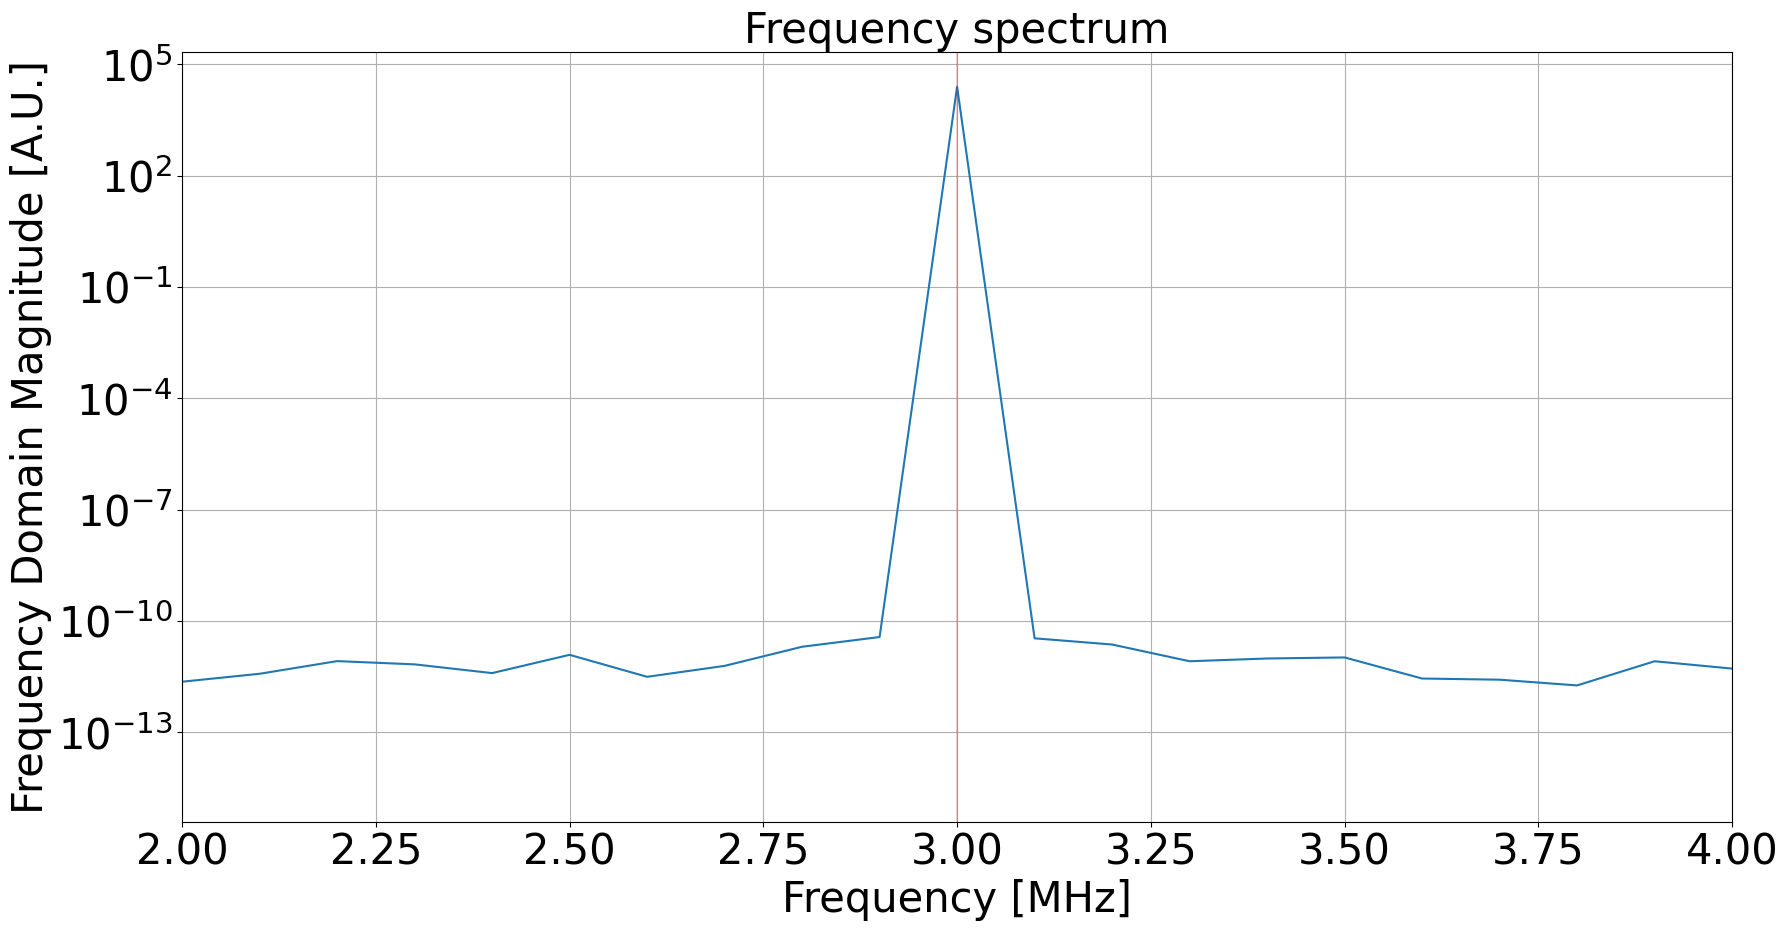

In [27]:
f1 = 2
f2 = 4

plt.figure(figsize=(20, 10))
#plt.errorbar(freqs, avg_fft_au, yerr = stds_fft, fmt='o', markersize = 2, ecolor='red', capsize = 3, capthick=1, elinewidth=1)
plt.plot(freqs, magnitudes)

plt.axvline(3, color = 'red', alpha = 0.2)
plt.title('Frequency spectrum', fontsize = 30)
plt.xlabel('Frequency [MHz]', fontsize = 30)
plt.xticks(fontsize = 30)
plt.ylabel('Frequency Domain Magnitude [A.U.]', fontsize = 30)
plt.yticks(fontsize = 30)
plt.semilogy()
plt.grid(True)
plt.xlim(f1, f2)
#plt.semilogx()

#plt.savefig("250724_17.23/fft.pdf", format = "pdf", bbox_inches="tight")
plt.show()

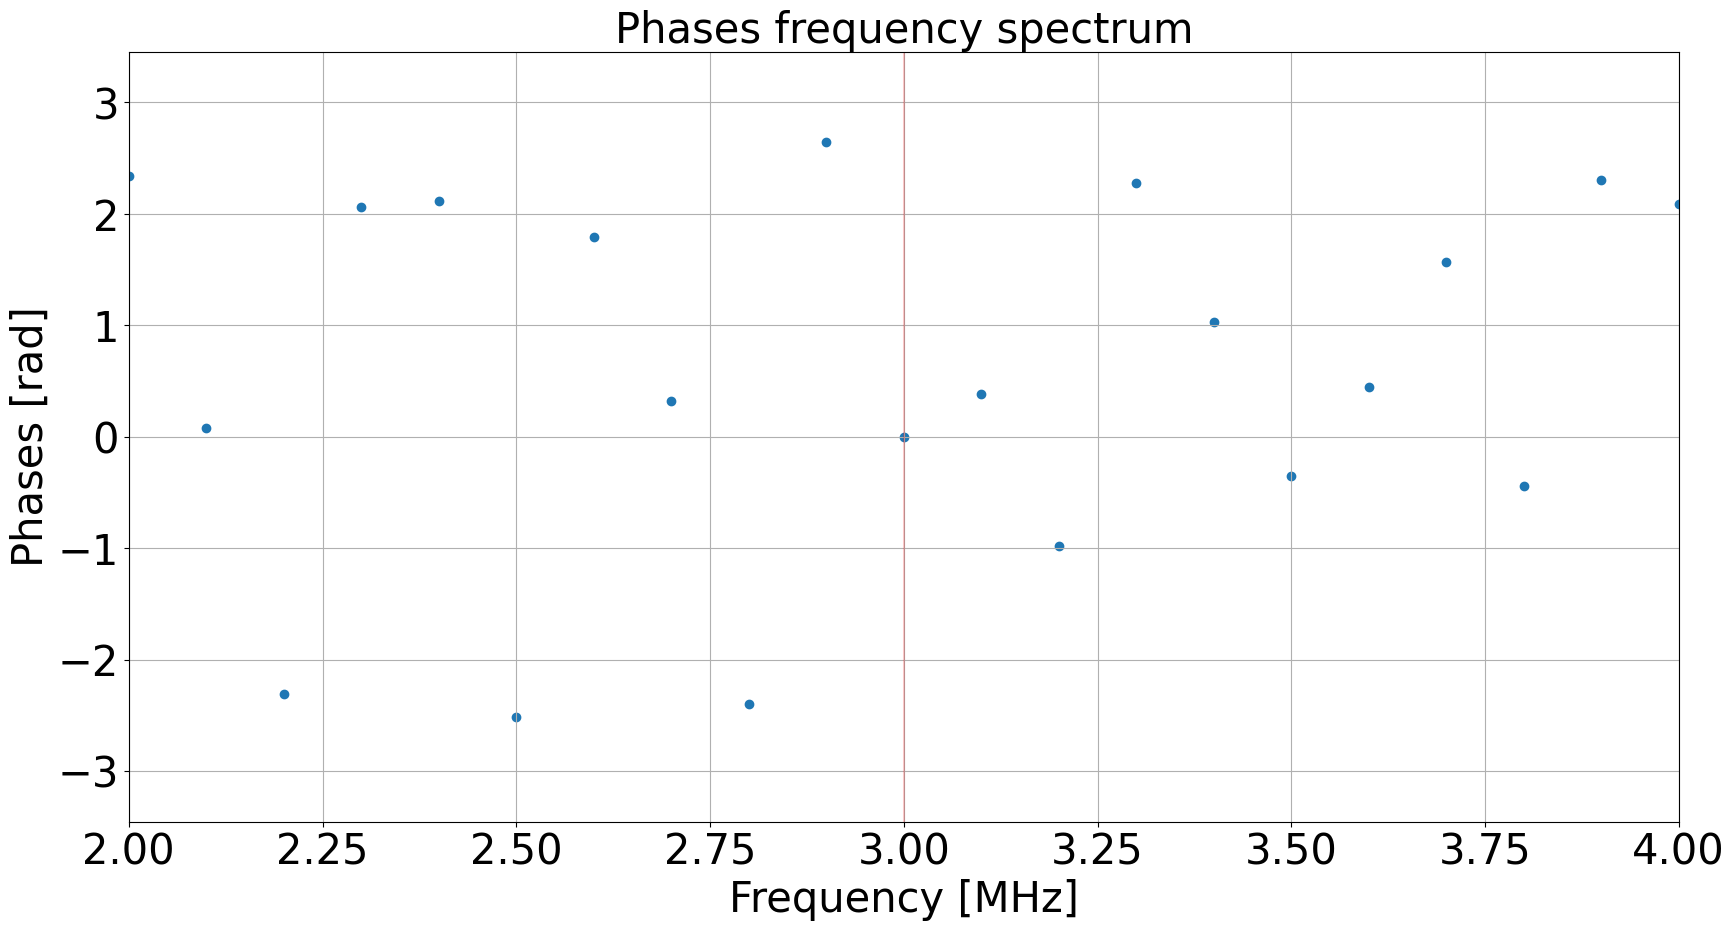

In [28]:
plt.figure(figsize=(20, 10))
#plt.errorbar(freqs, avg_fft_au, yerr = stds_fft, fmt='o', markersize = 2, ecolor='red', capsize = 3, capthick=1, elinewidth=1)
plt.scatter(freqs, phases)

plt.axvline(3, color = 'red', alpha = 0.2)
plt.title('Phases frequency spectrum', fontsize = 30)
plt.xlabel('Frequency [MHz]', fontsize = 30)
plt.xticks(fontsize = 30)
plt.ylabel('Phases [rad]', fontsize = 30)
plt.yticks(fontsize = 30)
plt.grid(True)
plt.xlim(f1, f2)
#plt.semilogx()

#plt.savefig("250724_17.23/fft.pdf", format = "pdf", bbox_inches="tight")
plt.show()

## Filtering

In [36]:
peak_f, peak_phases = filtering_func(freqs, magnitudes, phases, f1, f2)
print(f"peak_phases: {peak_phases}")
print(f"peak_f: {peak_f}")

print(f"len_times: {len(times)}")

#times_new = np.arange(0, times[-1], 1 / f_s_new)
#print(f"len(times_new): {len(times_new)}")
#print(f"times_new: {times_new}")

times_new_2 = np.arange(N) / f_s_new
print(f"len(times_new_2): {len(times_new_2)}")
print(f"times_new_2: {times_new_2}")

print(f"f_s: {f_s}")

noise_wf = np.cos(peak_f* 2*np.pi * times + peak_phases)

sum: 1
peak_phases: [-2.26528167e-15]
peak_f: [3.]
len_times: 50000
len(times_new_2): 50000
times_new_2: [0.00000e+00 4.00000e-05 8.00000e-05 ... 1.99988e+00 1.99992e+00
 1.99996e+00]
f_s: 5000.0


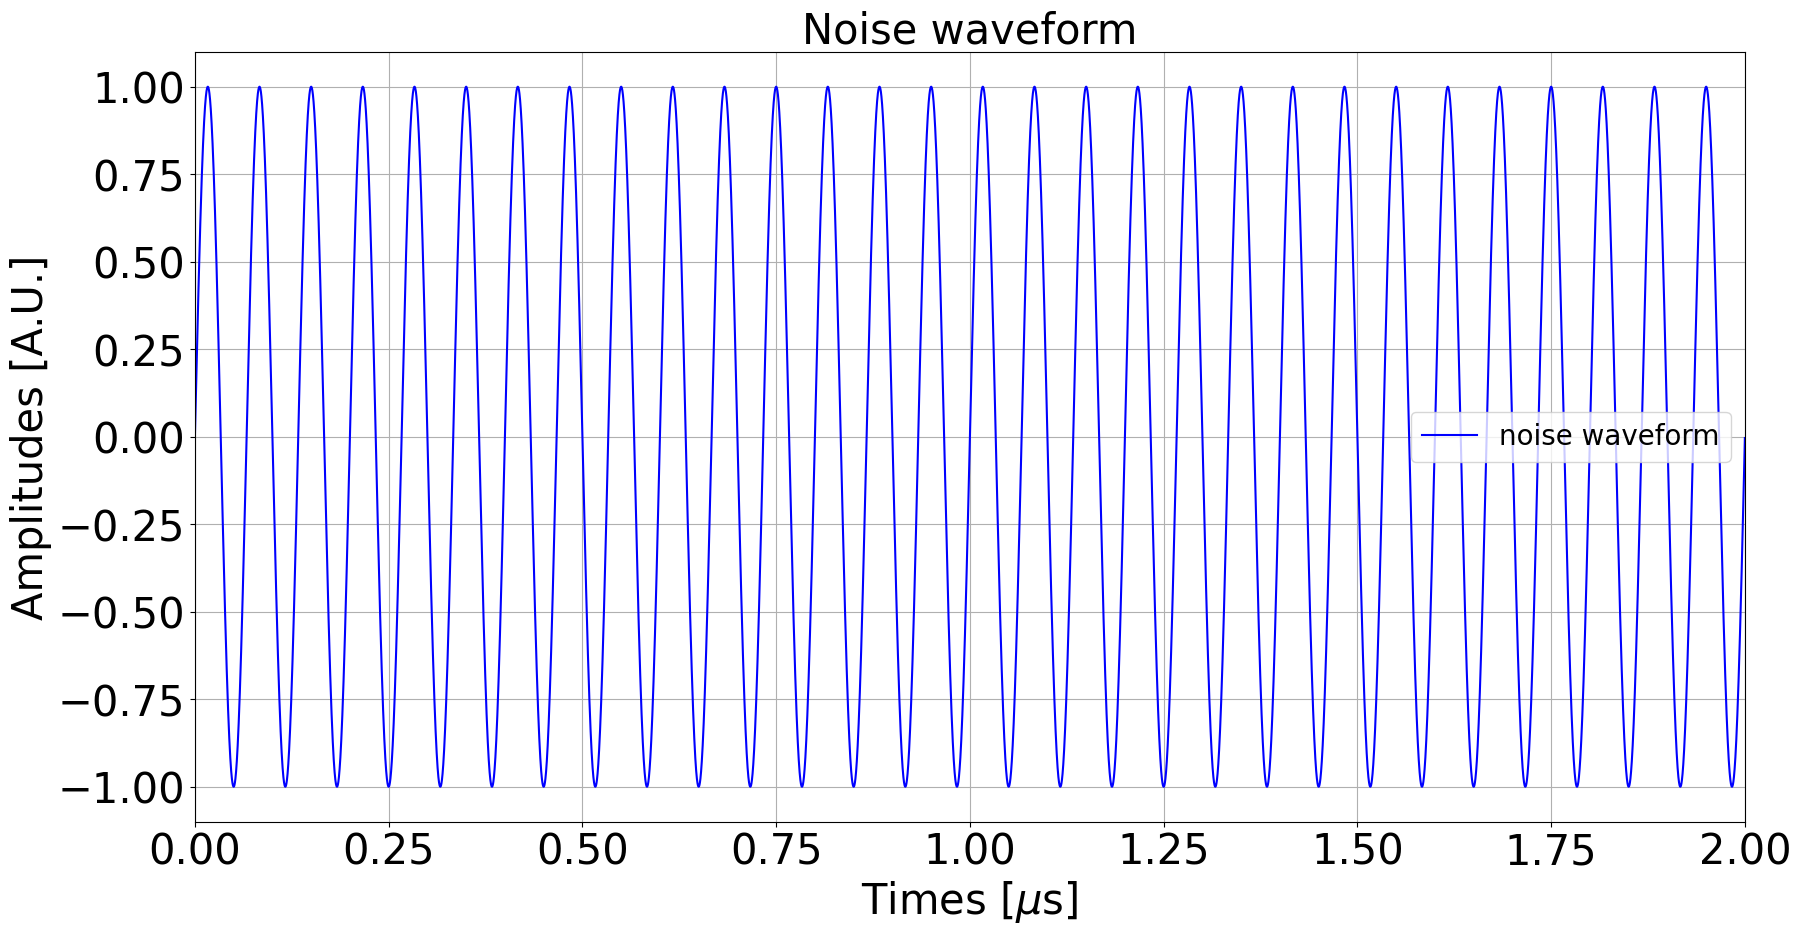

In [32]:
plt.figure(figsize=(20, 10))
#plt.errorbar(freqs, avg_fft_au, yerr = stds_fft, fmt='o', markersize = 2, ecolor='red', capsize = 3, capthick=1, elinewidth=1)
plt.plot(times_new_2, noise_wf, color = 'blue', label = 'noise waveform')

plt.title('Noise waveform', fontsize = 30)
plt.xlabel(r'Times [$\mu$s]', fontsize = 30)
plt.xticks(fontsize = 30)
plt.ylabel('Amplitudes [A.U.]', fontsize = 30)
plt.yticks(fontsize = 30)
plt.grid(True)
plt.xlim(0, 2)
plt.legend(loc = 'best', fontsize = 20)

#plt.savefig("250724_17.23/fft.pdf", format = "pdf", bbox_inches="tight")
plt.show()

## Compare to average waveform

In [37]:
print(len(magnitudes))
original_wf = fft.irfft(magnitudes)

25001


50000
50000


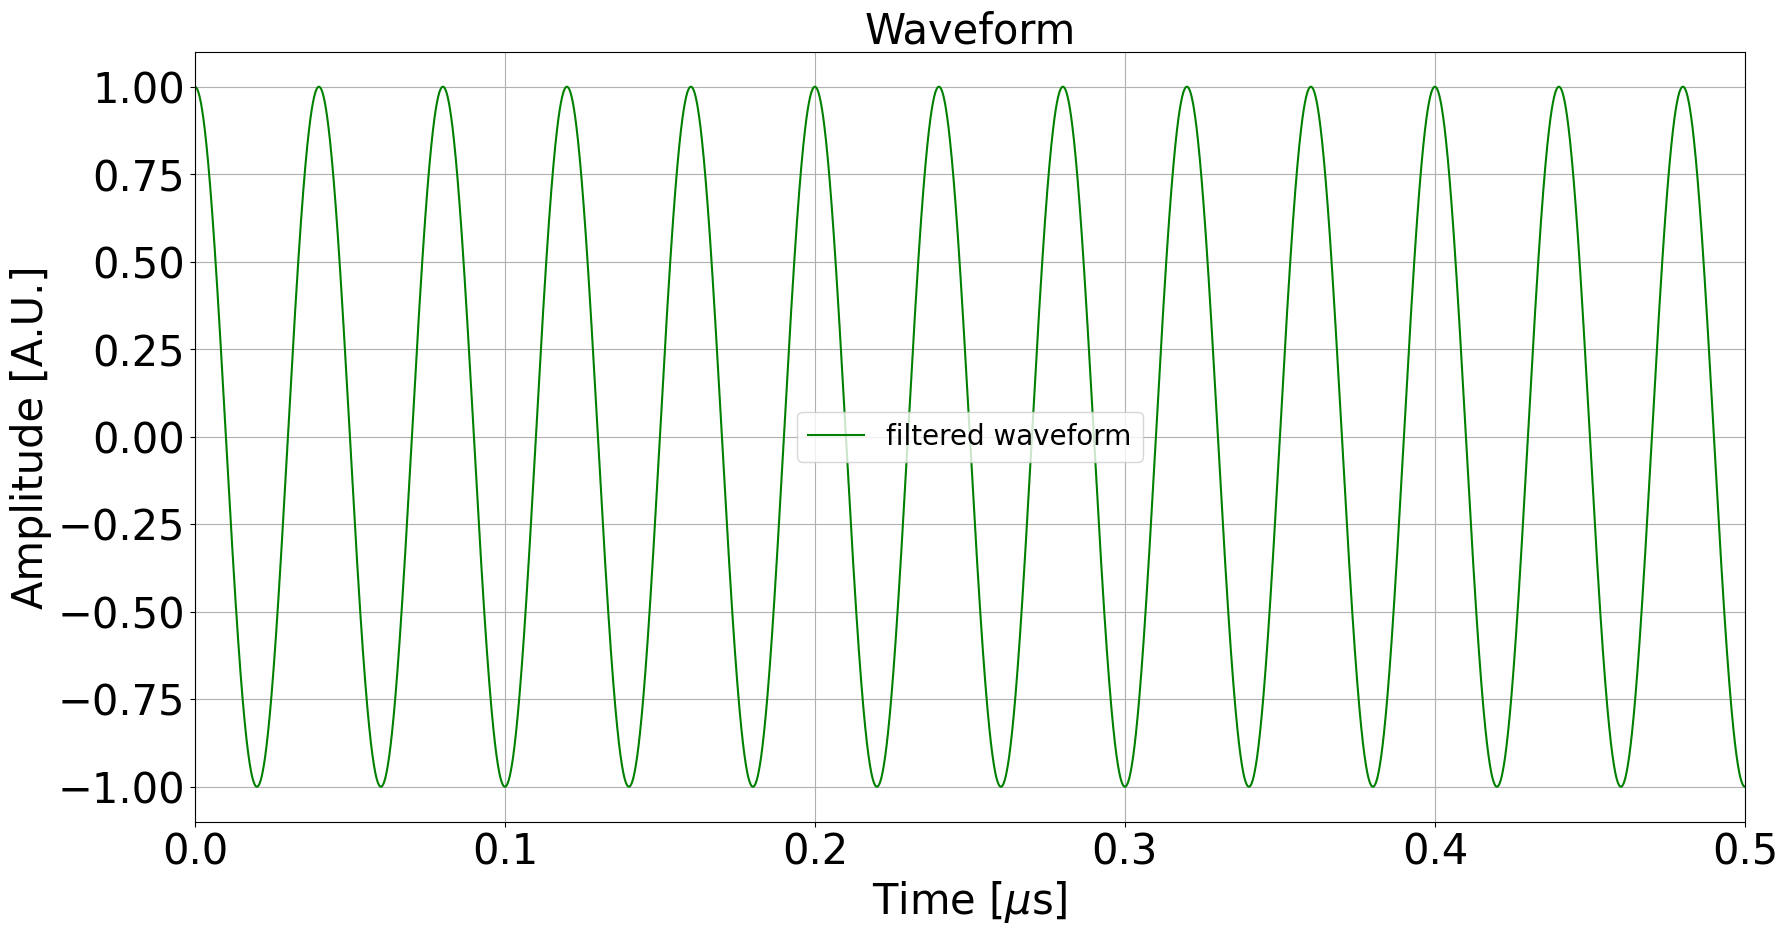

In [39]:
plt.figure(figsize = (20, 10))
print(len(original_wf))
print(len(noise_wf))
plt.plot(times_new_2, amplitudes - noise_wf, label = 'filtered waveform', color = 'green')
plt.title('Waveform', fontsize = 30)
plt.xlabel(r'Time [$\mu$s]', fontsize = 30)
plt.xticks(fontsize = 30)
plt.ylabel('Amplitude [A.U.]', fontsize = 30)
plt.yticks(fontsize = 30)
plt.grid(True)
plt.xlim(0, 0.5)
plt.legend(loc = 'best', fontsize = 20)

#plt.savefig("Results/simple_ifft.png", format = "png", bbox_inches="tight")
#plt.savefig("Results/simple_ifft.pdf", format = "pdf", bbox_inches="tight")
plt.show()

In [43]:
filtered_fft = fft.rfft(amplitudes - noise_wf)

50000
50000


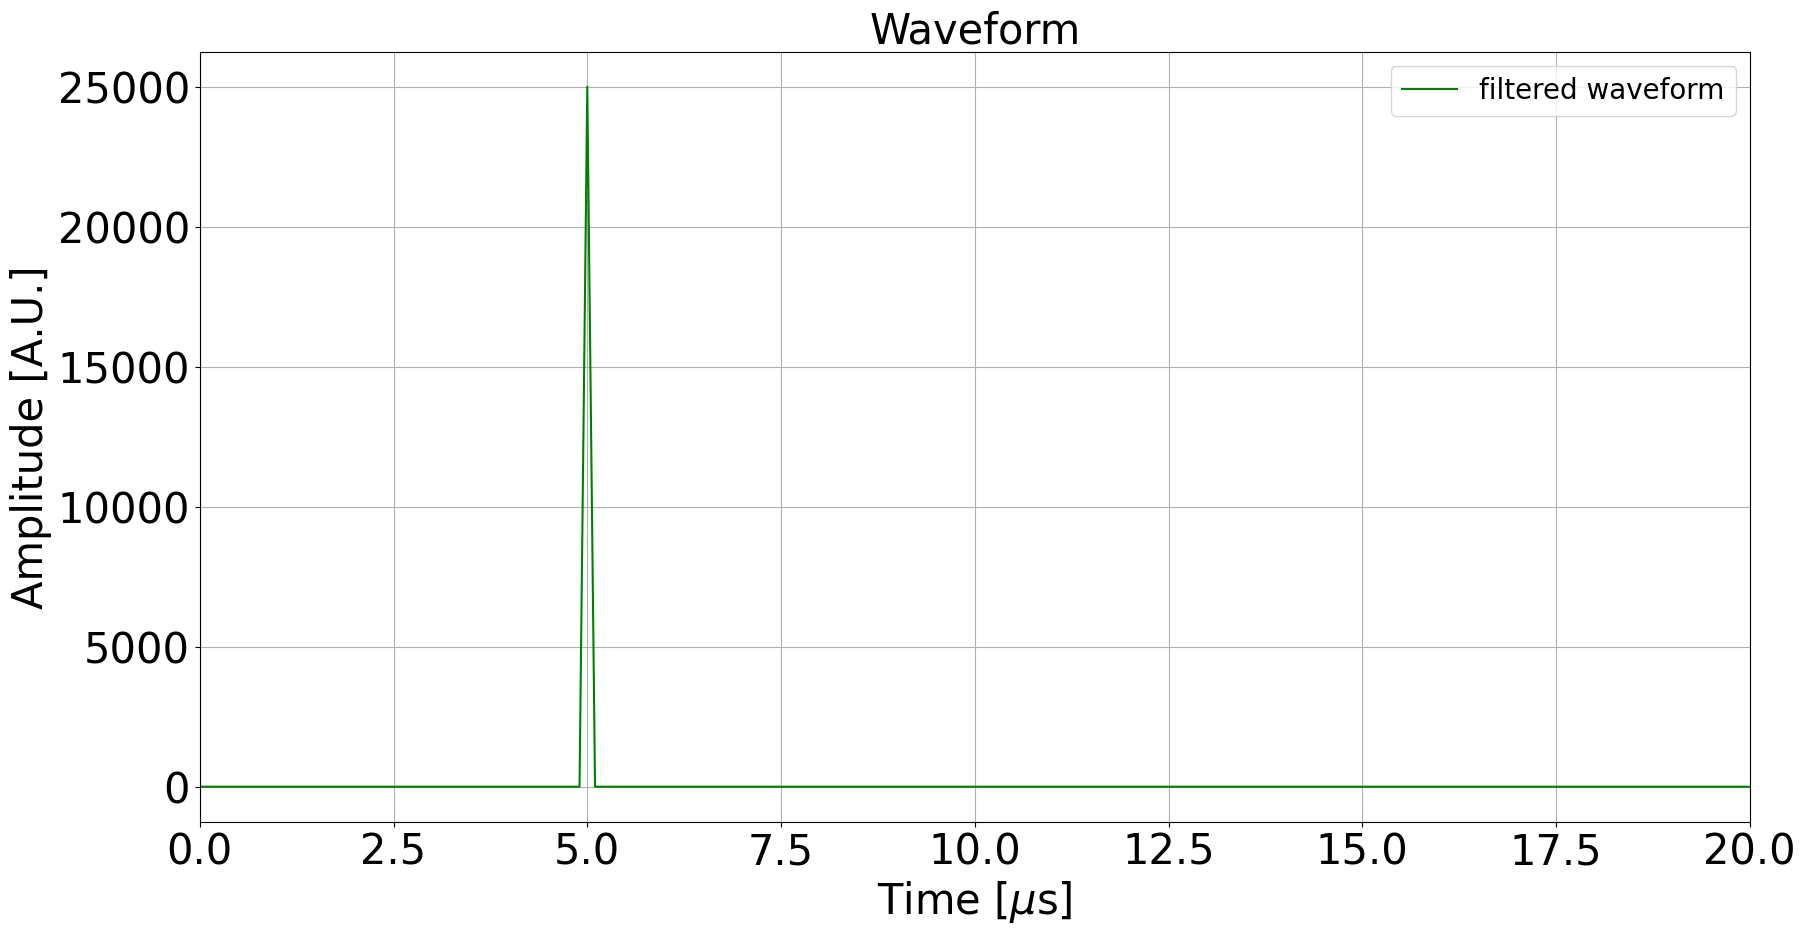

In [48]:
plt.figure(figsize = (20, 10))
print(len(original_wf))
print(len(noise_wf))
plt.plot(freqs, np.abs(filtered_fft), label = 'filtered waveform', color = 'green')
plt.title('Waveform', fontsize = 30)
plt.xlabel(r'Time [$\mu$s]', fontsize = 30)
plt.xticks(fontsize = 30)
plt.ylabel('Amplitude [A.U.]', fontsize = 30)
plt.yticks(fontsize = 30)
plt.grid(True)
plt.xlim(0, 20)
plt.legend(loc = 'best', fontsize = 20)

#plt.savefig("Results/simple_ifft.png", format = "png", bbox_inches="tight")
#plt.savefig("Results/simple_ifft.pdf", format = "pdf", bbox_inches="tight")
plt.show()

In [13]:
#CHECK THIS WITH 2 SIMPLE WF